# Exercise 2
## Group members:
* Antonio Feltrin
* Giosuè Sardo Infirri
* Riccardo Tancredi
* Simone Toso

#### Import all dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14
from IPython.display import display_html 
import pandas as pd
import gzip

#### Generation of data

In [2]:
# sigmoid takes into account energy difference =2
SPINS = False
# centering trick
centering = False
# type of encoding
one_hot = True
# type of gradient: Adam or Vanilla SGD
ADAM = True
# Data
data = "b" # else "c"
# If we want energy (computationally demanding)
Iwant_energy = True

In [3]:
# random seed for reproducibility
np.random.seed(12345)

# size of dataset
N = 10000
# number of block for one-hot encoding
G = 5
# number of categories
A = 4
# number of categories of kind 0
A0 = int(A/2)
# number of categories of kind 1
A1 = A-A0
#
AA = [A0, A1]
# size of each data point
L = G*A
#  
# Noise: probability q to change category
q = 0.1  # 0.1 then 
#
# a = 0.6
print(f"L={L}, A={A}, G={G}")

x,y = np.zeros((N,L)).astype(int), np.zeros(N).astype(int)

if data == "b":
    for n in range(N):
        # kind of the first slot
        k = np.random.randint(0,2)
        # label
        y[n] = k
        i0=0
        for g in range(G):
            # normal choice
            i = np.random.randint(0, AA[k])
            j = i + i0 + k*A0
            if np.random.random()<q:
                # normal choice
                i = np.random.randint(0,A)
                j = i + i0
            
            if(n<2): 
                print(f"k={k}, g={g}, i0={i0}, i={i}, j={j}, AA[k]={AA[k]}")
            # one-hot encoding
            x[n][j] = 1
            i0= i0 + A
            k = 1 - k
                    
        if(n<3): print(x[n], y[n])

    print("...")    

elif data == "c":
    x = np.loadtxt('Data_c/x_RBM_q0.2.dat', delimiter=" ",dtype=int)

else:
    print("Select your data")

L=20, A=4, G=5
k=0, g=0, i0=0, i=1, j=1, AA[k]=2
k=1, g=1, i0=4, i=2, j=6, AA[k]=2
k=0, g=2, i0=8, i=1, j=9, AA[k]=2
k=1, g=3, i0=12, i=1, j=15, AA[k]=2
k=0, g=4, i0=16, i=1, j=17, AA[k]=2
[0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0] 0
k=1, g=0, i0=0, i=1, j=3, AA[k]=2
k=0, g=1, i0=4, i=0, j=4, AA[k]=2
k=1, g=2, i0=8, i=1, j=11, AA[k]=2
k=0, g=3, i0=12, i=0, j=12, AA[k]=2
k=1, g=4, i0=16, i=1, j=19, AA[k]=2
[0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1] 1
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0] 1
...


In [4]:
def is_one(cell_value):
    color0 = 'background-color: blue; color: white'
    color1 = 'background-color: cyan;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=12
df0 = pd.DataFrame(x[:N1])

df0s = df0.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)

display_html(df0s._repr_html_(), raw=True)

df=df0
t=[i for i in range(N1)]
g = pd.Categorical(df[t]).codes # convert groups to indices  
df.style.apply(
    lambda x: ['background-color: {}'.format("#FFCCCC") for i in g], 
    subset=[0,1,2,3, 8,9,10,11, 16,17,18,19 ]
)

Original 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 1 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 2 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 3 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 4 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 5 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 
 
 6 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 7 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 8 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 9 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 10 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 11 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0

## We work with [0, 1] bits

In [5]:
# We name "v" for "visible" instead of using x
v = np.copy(x)
# store in v0, because later we will shuffle v
v0 = np.copy(v)

if SPINS:
    GAP = 2 # is given by setting Energy levels = +- 1 and from the Boltzmann distribution getting a sigmoid function with coefficient 2 at the exponent
    v = 2*v - 1
    vmin = -1
else:
    GAP = 1
    vmin = 0

# RBM, number of hidden units
M = 6

# range of each initial weight
sigma = np.sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L, M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w[:3] =", w[:3])
print("a =", a[:3])
print('...')
w0, a0, b0 = np.copy(w), np.copy(a), np.copy(b)

w[:3] = [[-0.08029295  0.18785703 -0.20374063 -0.21797536  0.77104258  0.54653873]
 [ 0.03644147  0.11050993  0.30163547  0.48889193  0.39505217 -0.50841975]
 [ 0.10786059  0.08978702  0.53065764  0.34768619 -0.78510675 -0.14584864]]
a = [-0.88361978 -0.45766925  0.13869612]
...


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1]


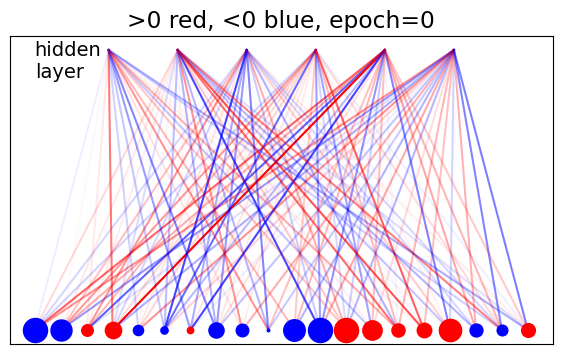

In [6]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(7, 4))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=min(300, A*abs(a[i])), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [7]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in,wei,bias,DE,info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + np.exp(-DE*act))     # updated sigmoid function
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

k = 0
activate(v[k],w,b,GAP,info=True)

input= [0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0]
act= [ 0.12148004  0.28349252 -0.95747708  1.3998517   0.20832786 -0.14909014]
prob= [0.53033272 0.57040225 0.27738361 0.80216035 0.55189441 0.46279635]
output= [0 0 0 1 0 0]


array([0, 0, 0, 1, 0, 0])

We use the method of fixing the one-hot encoding. We remind that, given the possibilities $[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]$, the energy of each group is given by $E = \sum_i a_i v_i + \sum_{i,\mu}W_{i\mu}v_ih_\mu$. (In theory there would also be the term $\sum_\mu b_\mu h_\mu$. However, since this term is the same for all of the possible encodings, we will neglect it when evaluating the probability of each encoding).

In [8]:
def one_hot_generator(nBlocks, w, h, a):
    encodings = [np.array([1,0,0,0]),np.array([0,1,0,0]),np.array([0,0,1,0]),np.array([0,0,0,1])]
    if SPINS:
        for i in range(len(encodings)):
            encodings[i] = 2*encodings[i] - np.ones(A, dtype=int)
    vf = np.zeros(L) #initialized as zeros
    for block in range(nBlocks):
        #try all encodings and choose one at random with probability given my maxwell boltzmann
        probabilities = []
        for encoding in encodings: #for each possible encoding 1000, 0100, ...
            energy = np.dot(a[block*4: (block+1)*4] + w[block*4:(block+1)*4, ]@h, encoding)
            probabilities.append(np.exp(energy))
        probabilities = probabilities / sum(probabilities) #normalize    
        cumulatives = [sum(probabilities[:i+1]) for i in range(4)] 
        random = np.random.uniform(0.,0.9999)
        choice = 0
        for i in range(4):
            if cumulatives[i] > random:
                choice = i
                break
        #Now choice is index of the encoding we want.
        vf[block*4:(block+1)*4] = encodings[choice]
    return vf

## ADAM class

In [9]:
class AdamOptim():
    def __init__(self, eta=1e-3, beta1=0.9, beta2=0.99, epsilon=1e-8):
        self.m_dw, self.v_dw = np.zeros((L, M)), np.zeros((L, M))
        self.m_da, self.v_da = np.zeros(L), np.zeros(L)
        self.m_db, self.v_db = np.zeros(M), np.zeros(M)
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
        
    def update(self, t, w, a, b, dw, da, db):
        ## dw, da, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        self.m_dw = self.beta1*self.m_dw + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db
        # *** biases of hidden units *** #
        self.m_da = self.beta1*self.m_da + (1-self.beta1)*da

        ## rms beta 2
        # *** weights *** #
        self.v_dw = self.beta2*self.v_dw + (1-self.beta2)*(dw**2)
        # *** biases of hidden units *** #
        self.v_da = self.beta2*self.v_da + (1-self.beta2)*(da**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db**2)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_da_corr = self.m_da/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        v_dw_corr = self.v_dw/(1-self.beta2**t)
        v_da_corr = self.v_da/(1-self.beta2**t)
        v_db_corr = self.v_db/(1-self.beta2**t)


        ## update weights and biases
        w = w + self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        a = a + self.eta*(m_da_corr/(np.sqrt(v_da_corr)+self.epsilon))
        b = b + self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        # m_dw, m_da, m_db = self.m_dw, self.m_da, self.m_db
        return w, a, b #, self.m_dw, self.m_da, self.m_db

### Vanilla SGD

In [10]:
def vanilla(w, a, b, dw, da, db):
# basic step of vanilla gradient descent, from eq.(211)
    w = w + dw
    a = a + da
    b = b + db
    return w, a, b

### Energy via log likelihood

In [11]:
def energy_is(v, h, w, a, b):
    eng = - np.dot(a,v) - np.dot(b,h) -  np.dot(v.T@w,h)
    return eng

def one_hot_generator2(input, A, G):
    encodings = [np.array([0,0,0,1]), np.array([0,0,1,0]), np.array([0,1,0,0]), np.array([1,0,0,0])]
    output = []
    for i in input:
        output.append(encodings[int(i)])
    output = np.array(output)
    output = output.reshape(A*G,)
    if SPINS:
        output = output*GAP + np.full(A*G,vmin) 
    return output

def log_likelihood(w, a, b, v, h):
    eng, Z, L = 0, 0, 0 #Z = sum_x p(x) = sum_x
    for i in range(N):
        eng += energy_is(v[i], h[i],w,a,b)
    eng /= v.shape[0] # N

    num_config = (A**G)*(2**M)
    for i in range(int(A**G)): # A**G = 4**5 1024, 2*M
        vgen = np.base_repr(i, base=A).zfill(G)
        vgen = one_hot_generator2(vgen, A,G)
        for j in range(int(2**M)):
            hgen = np.base_repr(j, base=2).zfill(M) 
            hgen = np.array([int(x) for x in str(hgen)])
            if SPINS:
                hgen = hgen*GAP + np.full(M,vmin)
            #print(f"vtype = {vgen.dtype}, hgen.dtype = {hgen.dtype}")
            #print(f"vgen={vgen}")
            Z += np.exp(energy_is(vgen, hgen, w, a, b)) #? *GAP
            #print(Z)
    Z /= num_config
    L = eng + np.log(Z) # now L is going to be minimize
    return L

In [12]:
def E_AAI(v, h):
    # this function works properly only with [0, 1] representation
    if SPINS:
        v = ((v + 1)/2).astype(int)
        h = ((h + 1)/2).astype(int)
    # let's calculate A_S & A_T
    A_S, A_T = 0, 0
    # all_distances_TS, all_distances_ST, all_distances_SS, all_distances_TT = np.zeros((v.shape[0], v.shape[0])),np.zeros((v.shape[0], v.shape[0])), np.zeros((v.shape[0], v.shape[0])), np.zeros((v.shape[0], v.shape[0]))
    for i in range(v.shape[0]):
        distances_TS = np.sum((h[i] ^ v), axis=1)
        distances_ST = np.sum((v[i] ^ h), axis=1)
        distances_SS = np.sum((v[i] ^ v), axis=1)
        distances_TT = np.sum((h[i] ^ h), axis=1)
        # update of the diagonal element
        # In this way the diagonal elements are 0: we sum to the diagonal element +30 (+20 it's still ok) so that the diagonal elements are not spotted
        # This because there could be non diagonal elements for which the distance is zero.
        distances_SS[i] = 30
        distances_TT[i] = 30

        A_S += 1 if np.min(distances_SS) < np.min(distances_ST) else 0
        A_T += 1 if np.min(distances_TT) < np.min(distances_TS) else 0

    print("...")
    return A_S/v.shape[0], A_T/v.shape[0]

In [13]:
def E(v, v1):
    A_S, A_T = E_AAI(v, v1)
    return A_S, A_T, (A_S-0.5)**2+(A_T-0.5)**2

### Our score

In [14]:
def our_score(v0, v1):
    scores = 0 #fa +1 per ogni riga giusta

    #Ricordiamoci che il dataframe è storto, giusto perché questo programma non era abbasta complicato
    # col - riga

    df0 = pd.DataFrame(v0[:N])
    df1 = pd.DataFrame(((v1[:N]-vmin)/(1-vmin)).astype(int))

    nBlocks = int(L/4)

    for nRiga in range(N): 
        #Controlla se questa riga è con alternanza sinistra destra
        riga = df1.iloc[nRiga,:]
        positions = [] 
        positionsLettere = [] #scritti "destra" "sinistra"
        corretto = True
        for block in range(nBlocks): # DSDSDSDS --> controlli che non si r
            doppio = 0
            blocchetto = riga[block*4:(block+1)*4]
            indice = 0
            for i in range(4):
                if blocchetto[block*4 + i] == 1:
                    indice = i
                    doppio += 1
            if doppio != 1:
                corretto = False
            if indice < 2:
                positions.append(0) # 0 --> sinistra
                positionsLettere.append("sinistra ")
            else:
                positions.append(1) # 1 --> destra
                positionsLettere.append("destra ")

        for indice in range(len(positions)-1): #per ogni 0 1 etc
            if positions[indice] == positions[indice+1]:
                corretto = False
        if corretto == True:
            scores += 1
        if corretto == False:
            # print(nRiga, " è sbagliata")
            # print(positionsLettere)
            pass
            
    # print("Score: ", scores/N)
    return  scores/N

### Entropy

In [15]:
def S(v, v1):
    idx1 = np.random.randint(v.shape[0], size=int(v.shape[0]/2))
    idx2 = np.random.randint(v1.shape[0], size=int(v1.shape[0]/2))
    v_1_new = np.concatenate((v[idx1, :], v1[idx2, :]))
    delta_entropy = len(gzip.compress(v))/len(gzip.compress(v_1_new)) -1 
    return delta_entropy

## RBM train


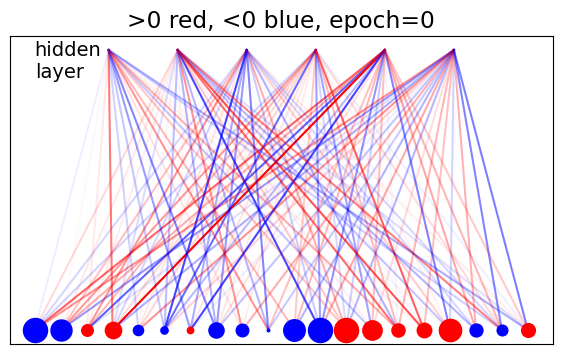

epoch =  0
epoch =  1
epoch =  2
epoch =  3
epoch =  4
epoch =  5
epoch =  6
epoch =  7
epoch =  8


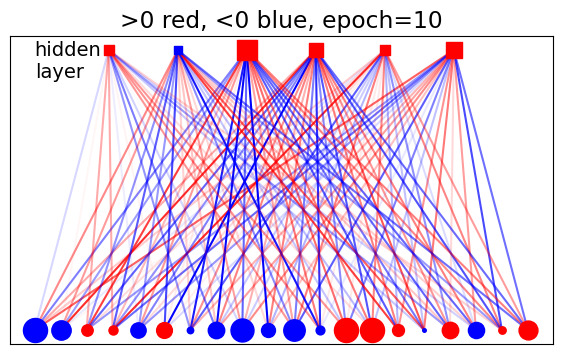

...
epoch =  9
epoch =  10
epoch =  11
epoch =  12
epoch =  13
epoch =  14
epoch =  15
epoch =  16
epoch =  17
epoch =  18


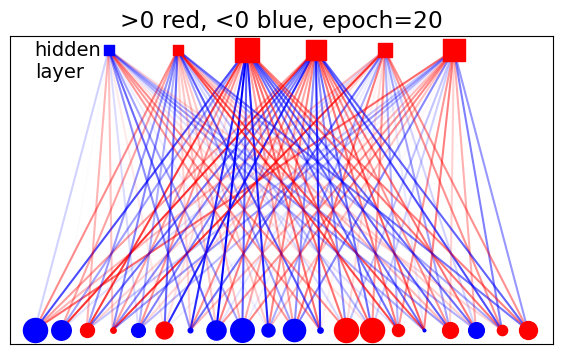

...
epoch =  19
epoch =  20
epoch =  21
epoch =  22
epoch =  23
epoch =  24
epoch =  25
epoch =  26
epoch =  27
epoch =  28


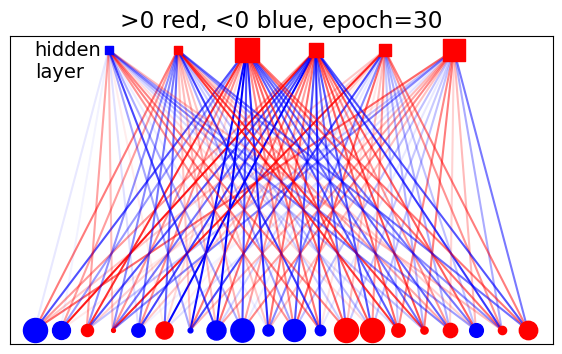

...
epoch =  29
epoch =  30
epoch =  31
epoch =  32
epoch =  33
epoch =  34
epoch =  35
epoch =  36
epoch =  37
epoch =  38


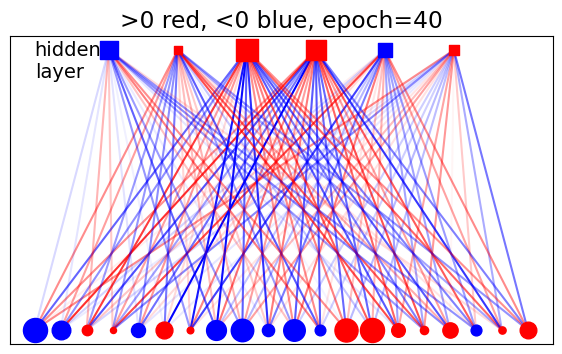

...
epoch =  39
epoch =  40
epoch =  41
epoch =  42
epoch =  43
epoch =  44
epoch =  45
epoch =  46
epoch =  47
epoch =  48


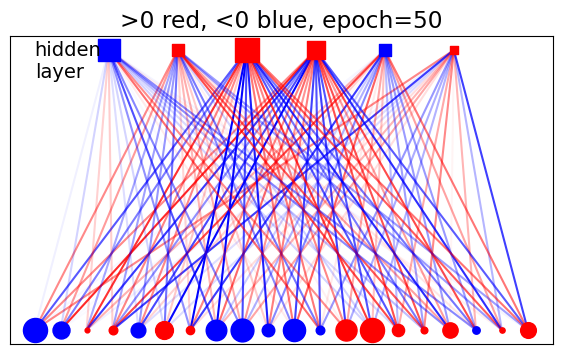

...
epoch =  49
epoch =  50
epoch =  51
epoch =  52
epoch =  53
epoch =  54
epoch =  55
epoch =  56
epoch =  57
epoch =  58


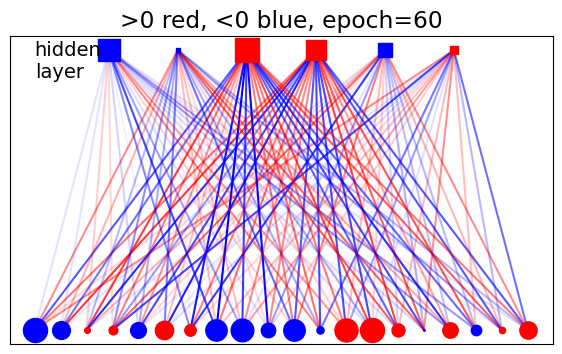

...
epoch =  59
epoch =  60
epoch =  61
epoch =  62
epoch =  63
epoch =  64
epoch =  65
epoch =  66
epoch =  67
epoch =  68


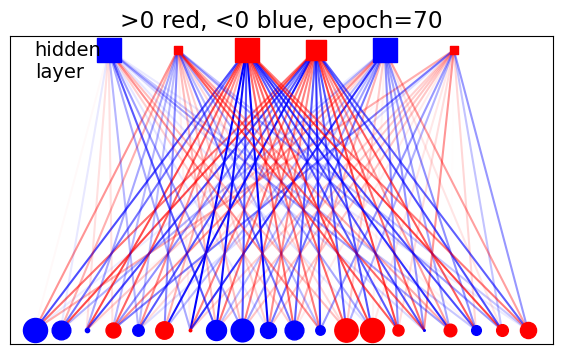

...
epoch =  69
epoch =  70
epoch =  71
epoch =  72
epoch =  73
epoch =  74
epoch =  75
epoch =  76
epoch =  77
epoch =  78


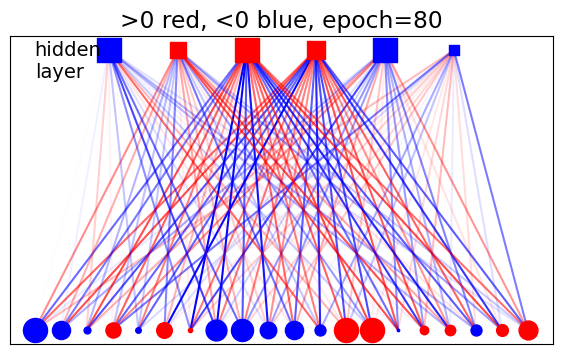

...
epoch =  79
epoch =  80
epoch =  81
epoch =  82
epoch =  83
epoch =  84
epoch =  85
epoch =  86
epoch =  87
epoch =  88


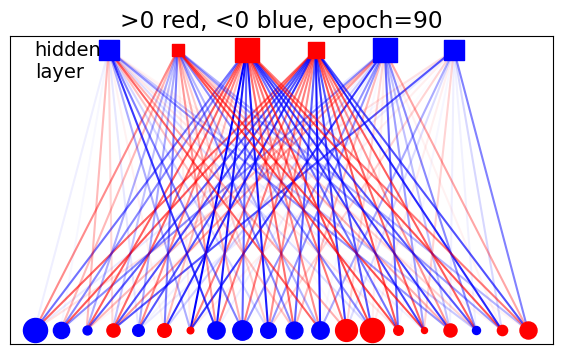

...
epoch =  89
epoch =  90
epoch =  91
epoch =  92
epoch =  93
epoch =  94
epoch =  95
epoch =  96
epoch =  97
epoch =  98


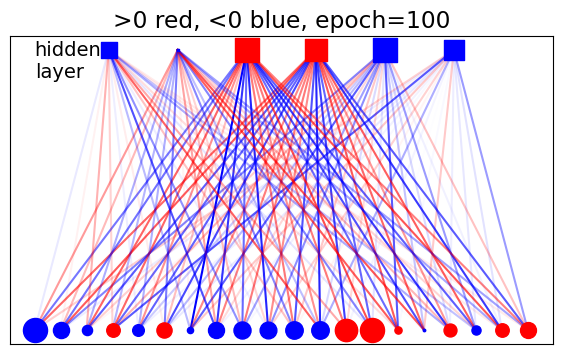

...
epoch =  99
epoch =  100
epoch =  101
epoch =  102
epoch =  103
epoch =  104
epoch =  105
epoch =  106
epoch =  107
epoch =  108


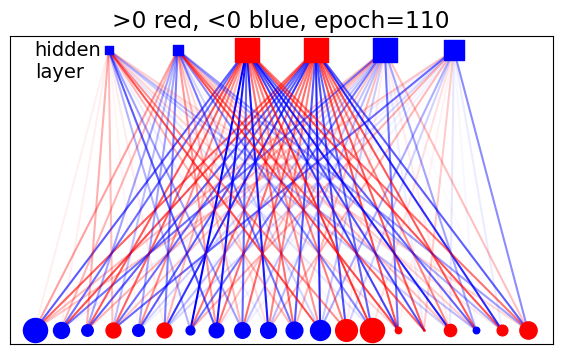

...
epoch =  109
epoch =  110
epoch =  111
epoch =  112
epoch =  113
epoch =  114
epoch =  115
epoch =  116
epoch =  117
epoch =  118


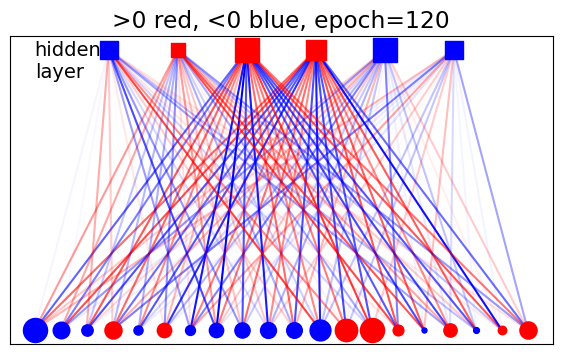

...
epoch =  119
epoch =  120
epoch =  121
epoch =  122
epoch =  123
epoch =  124
epoch =  125
epoch =  126
epoch =  127
epoch =  128


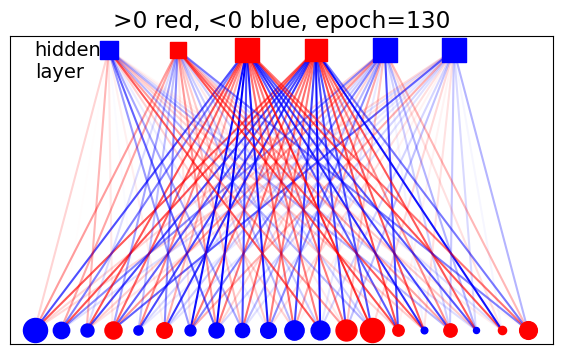

...
epoch =  129
epoch =  130
epoch =  131
epoch =  132
epoch =  133
epoch =  134
epoch =  135
epoch =  136
epoch =  137
epoch =  138


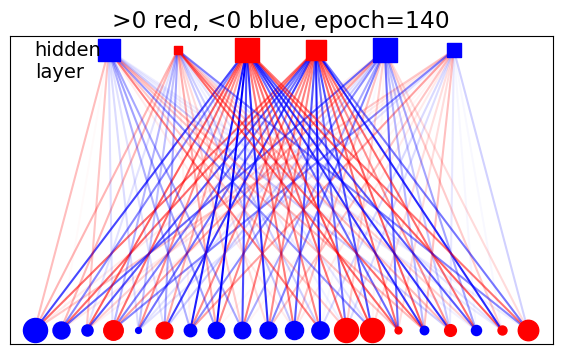

...
epoch =  139
epoch =  140
epoch =  141
epoch =  142
epoch =  143
epoch =  144
epoch =  145
epoch =  146
epoch =  147
epoch =  148


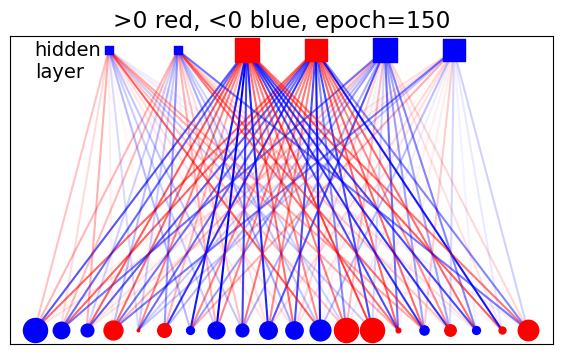

...
epoch =  149
epoch =  150
epoch =  151
epoch =  152
epoch =  153
epoch =  154
epoch =  155
epoch =  156
epoch =  157
epoch =  158


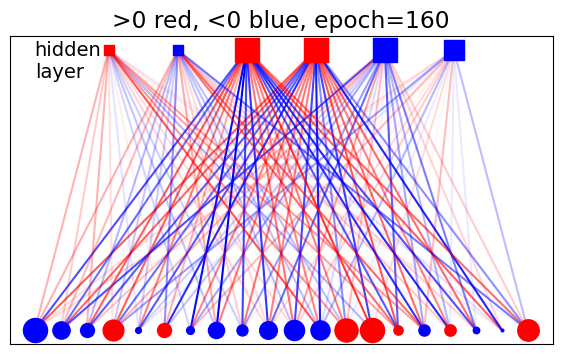

...
epoch =  159
epoch =  160
epoch =  161
epoch =  162
epoch =  163
epoch =  164
epoch =  165
epoch =  166
epoch =  167
epoch =  168


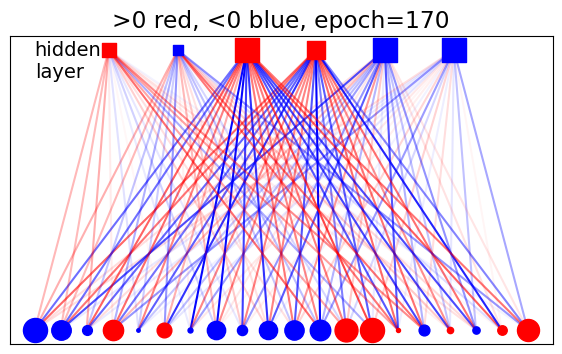

...
epoch =  169
epoch =  170
epoch =  171
epoch =  172
epoch =  173
epoch =  174
epoch =  175
epoch =  176
epoch =  177
epoch =  178


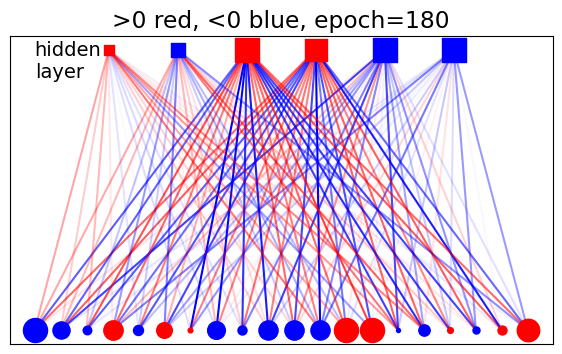

...
epoch =  179
epoch =  180
epoch =  181
epoch =  182
epoch =  183
epoch =  184
epoch =  185
epoch =  186
epoch =  187
epoch =  188


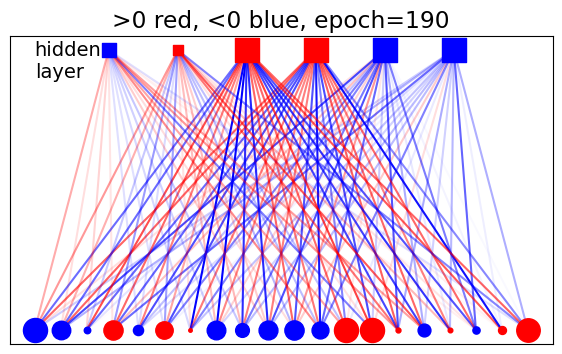

...
epoch =  189
epoch =  190
epoch =  191
epoch =  192
epoch =  193
epoch =  194
epoch =  195
epoch =  196
epoch =  197
epoch =  198


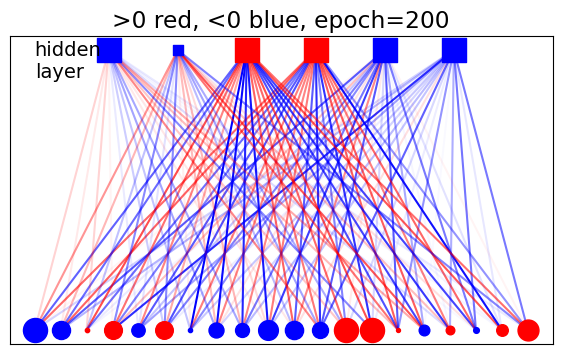

...
epoch =  199
epoch =  200
epoch =  201
epoch =  202
epoch =  203
epoch =  204
epoch =  205
epoch =  206
epoch =  207
epoch =  208


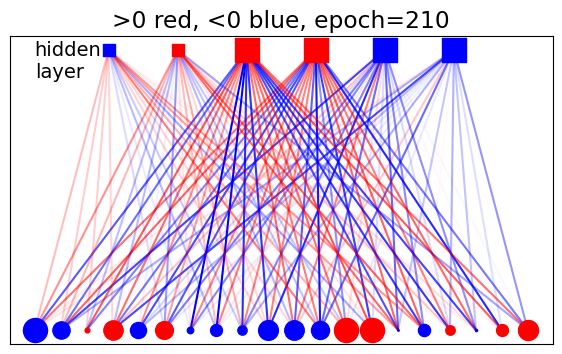

...
epoch =  209
epoch =  210
epoch =  211
epoch =  212
epoch =  213
epoch =  214
epoch =  215
epoch =  216
epoch =  217
epoch =  218


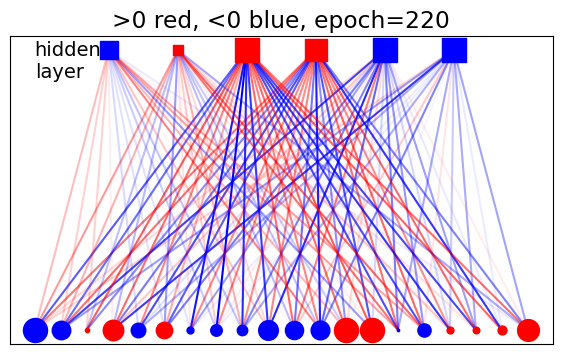

...
epoch =  219
epoch =  220
epoch =  221
epoch =  222
epoch =  223
epoch =  224
epoch =  225
epoch =  226
epoch =  227
epoch =  228


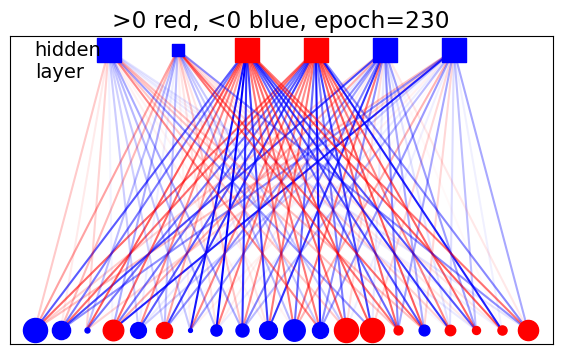

...
epoch =  229
epoch =  230
epoch =  231
epoch =  232
epoch =  233
epoch =  234
epoch =  235
epoch =  236
epoch =  237
epoch =  238


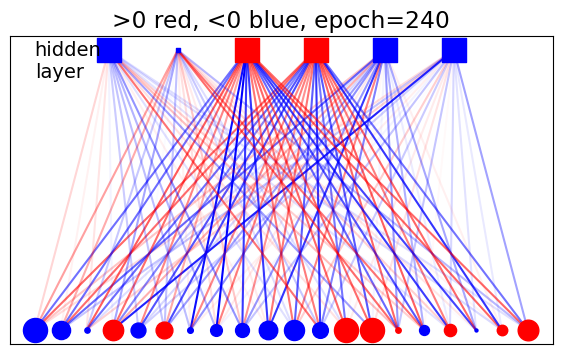

...
epoch =  239
epoch =  240
epoch =  241
epoch =  242
epoch =  243
epoch =  244
epoch =  245
epoch =  246
epoch =  247
epoch =  248


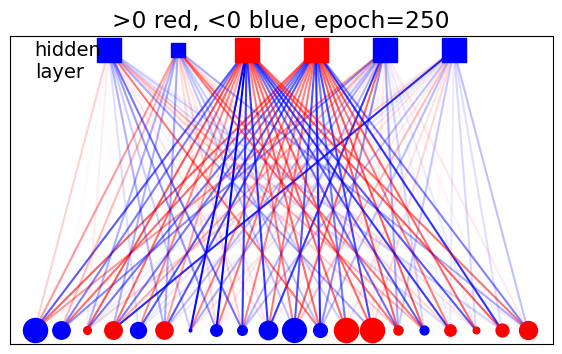

...
epoch =  249
epoch =  250
epoch =  251
epoch =  252
epoch =  253
epoch =  254
epoch =  255
epoch =  256
epoch =  257
epoch =  258


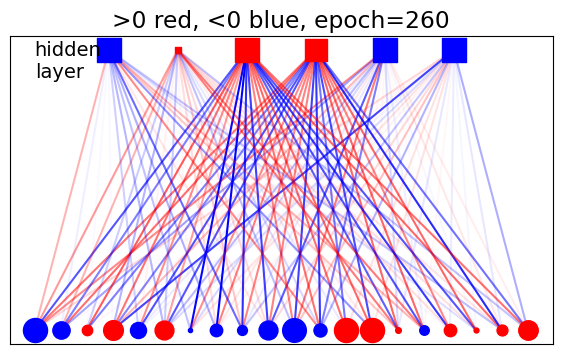

...
epoch =  259
epoch =  260
epoch =  261
epoch =  262
epoch =  263
epoch =  264
epoch =  265
epoch =  266
epoch =  267
epoch =  268


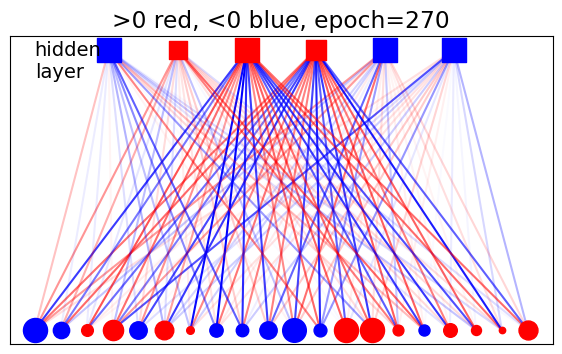

...
epoch =  269
epoch =  270
epoch =  271
epoch =  272
epoch =  273
epoch =  274
epoch =  275
epoch =  276
epoch =  277
epoch =  278


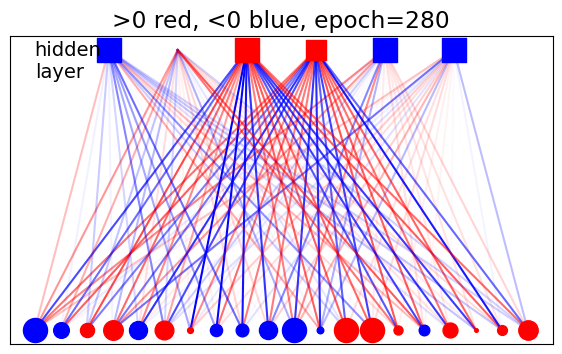

...
epoch =  279
epoch =  280
epoch =  281
epoch =  282
epoch =  283
epoch =  284
epoch =  285
epoch =  286
epoch =  287
epoch =  288


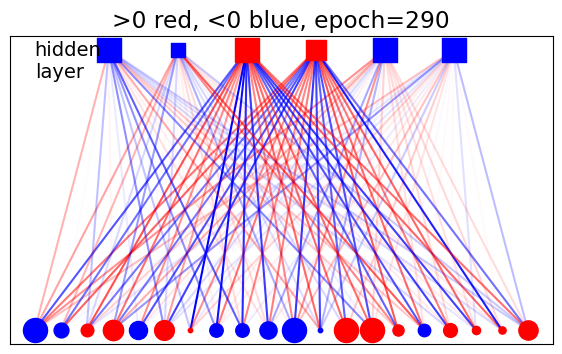

...
epoch =  289
epoch =  290
epoch =  291
epoch =  292
epoch =  293
epoch =  294
epoch =  295
epoch =  296
epoch =  297
epoch =  298


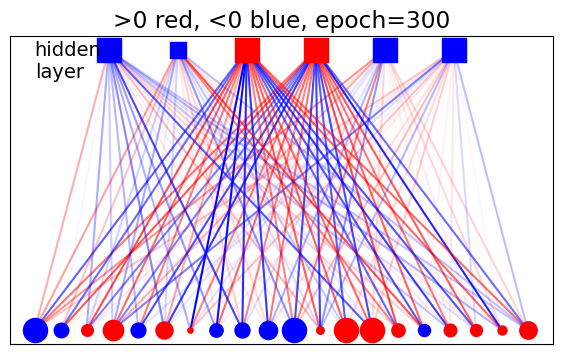

...
epoch =  299


In [16]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)

# learning rate for SGD
l_rate = 1.0

# One-hot encoding
nBlocks = int(L/4)

# minibatch
mini, m = 2, 0

# Adam definition
adam = AdamOptim()

# CD-n iterations
n = 1

# Time for Adam
t = 1 

# Number of epochs
epochs = 300

# Centering trick parameters
zed_a, zed_b = 0.01, 0.01

# energy & entropy sampling
A_S, A_T, energy, entropy = [], [], [], []
score, log_res = [], []

# train model
print('===================================================')
for epoch in range(epochs):
    havg, vavg = np.full(M, 0.25), np.full(L, 0.25)
    # aggregate normalization of batch statistics and learning rate
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))
            if centering:
                vdat, vmod, hdat, hmod = np.zeros((mini, L)), np.zeros((mini, L)), np.zeros((mini, M)), np.zeros((mini, M))
        # positive CD phase: generating h # CD-1 here, so only one iteration
        h = activate(v[k],w,b,GAP)  # change to h_f in case of CD-n, so a for loop in which the model is evaluated at time t=n
        # negative CD phase: generating fantasy vf
        # vf = activate(h,w.T,a,GAP)  # fantasy unit
        #Step 2: change visible variables
        # vf = one_hot_generator(nBlocks, w, h, a)
        # # one more positive CD phase: generating fantasy h from fantasy vf 
        # hf = activate(vf,w,b,GAP)
        h0 = np.copy(h)
        for _ in range(n):
            # positive CD phase: generating h # CD-n here, so n iterations
            # negative CD phase: generating fantasy vf
            # vf = activate(h, w.T, a, GAP)  # fantasy unit
            vf = one_hot_generator(nBlocks, w, h, a) if one_hot else activate(h, w.T, a, GAP)  # fantasy unit
            # one more positive CD phase: generating fantasy h from fantasy vf 
            hf = activate(vf, w, b, GAP)
            h = np.copy(hf) 

        
        v_data  += v[k]
        v_model += vf
        h_data  += h0   # h
        h_model += hf
        if not centering:
            vh_data += np.outer(v[k].T,h0)  # h
            vh_model+= np.outer(vf.T,hf)
    
        # centering trick
        if centering:
            vdat[m] = v[k]
            vmod[m] = vf
            hdat[m] = h0
            hmod[m] = hf
    
        m += 1
        # minibatch
        if m==mini:

            if centering:
                # Centering Trick
                havg_batch = h_data/mini
                vavg_batch = v_data/mini
                # Bortoletto uses hi*wij*vj so the opposite of our indexing
                a = a + zed_b*np.dot(w, (havg_batch - havg))
                b = b + zed_a*np.dot(w.T, (vavg_batch - vavg))

                vavg = (1 - zed_a)*vavg + zed_a*vavg_batch
                havg = (1 - zed_b)*havg + zed_b*havg_batch

                for l in range(mini):
                    vh_data += np.outer((vdat[l] - vavg).T,(hdat[l] - havg))
                    vh_model += np.outer((vmod[l] - vavg).T,(hmod[l] - havg))

            # gradient of the likelihood: follow it along its positive direction
            # Adam update:
            dw = (vh_data - vh_model)/mini  # gradient variable
            da = (v_data - v_model)/mini    # gradient variable
            db = (h_data - h_model)/mini    # gradient variable
            # Adam update:
            w, a, b = adam.update(t, w, a, b, dw, da, db) if ADAM else vanilla(w, a, b, dw, da, db)
            l_rate = l_rate / (0.01 * l_rate + 1) # if not ADAM
            m=0
            t+=1
    # t = 1
    # randomize the order of input data
    np.random.shuffle(v)
    if epoch%10==9:
        plotgraph(epoch+1)

        # calculation for each epoch
        # original, non-reshuffled data in v0
        v1 = np.zeros_like(v0)
        h = np.zeros((N, M))
        for k in range(N):
            # positive CD phase: generating h 
            h[k] = activate(v0[k],w,b,GAP)
            # negative CD phase: generating fantasy vf with low T == large GAP
            v1[k] = one_hot_generator(nBlocks, w, h[k], a) if one_hot else activate(h[k],w.T,a,GAP)
        
        # energy
        if Iwant_energy:
            a1, a2, en = E(v, v1)
            A_S.append(a1)
            A_T.append(a2)
            energy.append(en)

        # entropy
        entropy.append(S(v, v1))

        # our score
        score.append(our_score(v, v1))

        # log likelihood
        log_res.append(log_likelihood(w, a, b, v, h))

    print('epoch = ', epoch)

In [17]:
w[:3], a, b, dw[:3], da, db

(array([[ 0.69112571,  0.81324388, -1.34588717,  1.16815014,  0.89241293,
          0.47603957],
        [-0.07553297,  0.52359562, -1.25348871,  1.39966621,  0.04748962,
          0.12474506],
        [-0.70549656, -0.3873027 ,  1.51004435, -1.07984179,  0.20605716,
         -0.11971048]]),
 array([-0.93653382, -0.21894053,  0.13982103,  0.42866525, -0.22743604,
         0.30319156,  0.02893289, -0.18367744, -0.23403514, -0.34374154,
        -0.67997681,  0.05939566,  0.90288202,  0.74626611,  0.18302374,
        -0.15245233,  0.16647383,  0.14644486,  0.08403124,  0.31378609]),
 array([-1.61457791, -0.28966411,  1.36770885,  0.65749325, -0.93270231,
        -0.8332749 ]),
 array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. , -0.5,  0. ]]),
 array([ 0. ,  0. ,  0. ,  0. , -0.5,  0.5, -0.5,  0.5,  0. ,  0. ,  0.5,
        -0.5,  0. ,  0. ,  0. ,  0. ,  0.5, -0.5,  0.5, -0.5]),
 array([ 0. ,  0. ,  0. ,  0. , -0.5,  

In [18]:
# Until now beta was 1; we put it now equal to 40, so very low temperature, to clean up points
ampl = 40.
# original, non-reshuffled data in v0
v1 = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h 
    h = activate(v0[k],w,b,ampl*GAP)
    # negative CD phase: generating fantasy vf with low T == large GAP
    v1[k] = one_hot_generator(nBlocks, w, h, a) if one_hot else activate(h,w.T,a,ampl*GAP)
    # v1[k] = one_hot_generator(nBlocks, w, h, a)
# difference between fantasy and data
diff = (v1 - v0)/2

def is_one(cell_value):
    color0 = 'background-color: gray; color: white'
    color1 = 'background-color: gold;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

df0 = pd.DataFrame(v0[:N1])
df1 = pd.DataFrame(((v1[:N1]-vmin)/(1-vmin)).astype(int))

df0s = df0.style.set_table_attributes("style='display:inline'")
df1s = df1.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
df1s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)
df1s.set_caption('Denoised').set_table_styles(sty)

display_html(df0s._repr_html_()+df1s._repr_html_(), raw=True)

t=[i for i in range(N1)]
g = pd.Categorical(df[t]).codes # convert groups to indices  
df1.style.apply(
    lambda x: ['background-color: {}'.format("#FFCCCC") for i in g], 
    subset=[0,1,2,3, 8,9,10,11, 16,17,18,19 ]
)

Original 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 1 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 2 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 3 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 4 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 5 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 
 
 6 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 7 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 8 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 9 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 10 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 11 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 

 
 Denoised 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 1 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 2 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 3 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 4 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 5 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 6 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 7 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 8 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 
 
 9 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 
 
 10 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 11 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0

In [19]:
# Programma che controlla se i dati sono giusti 

scores = 0 #fa +1 per ogni riga giusta

#Ricordiamoci che il dataframe è storto, giusto perché questo programma non era abbasta complicato
# col - riga

df0 = pd.DataFrame(v0[:N])
df1 = pd.DataFrame(((v1[:N]-vmin)/(1-vmin)).astype(int))

nBlocks = int(L/4)

for nRiga in range(N): 
    #Controlla se questa riga è con alternanza sinistra destra
    riga = df1.iloc[nRiga,:]
    positions = [] 
    positionsLettere = [] #scritti "destra" "sinistra"
    corretto = True
    for block in range(nBlocks): # DSDSDSDS --> controlli che non si r
        doppio = 0
        blocchetto = riga[block*4:(block+1)*4]
        indice = 0
        for i in range(4):
            if blocchetto[block*4 + i] == 1:
                indice = i
                doppio += 1
        if doppio != 1:
            corretto = False
        if indice < 2:
            positions.append(0) # 0 --> sinistra
            positionsLettere.append("sinistra ")
        else:
            positions.append(1) # 1 --> destra
            positionsLettere.append("destra ")

    for indice in range(len(positions)-1): #per ogni 0 1 etc
        if positions[indice] == positions[indice+1]:
            corretto = False
    if corretto == True:
        scores += 1
    if corretto == False:
        print(nRiga, " è sbagliata")
        print(positionsLettere)
        
print("Score: ", scores/N)   

0  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'sinistra ']
3  è sbagliata
['sinistra ', 'sinistra ', 'destra ', 'sinistra ', 'destra ']
9  è sbagliata
['destra ', 'destra ', 'destra ', 'destra ', 'destra ']
23  è sbagliata
['destra ', 'sinistra ', 'destra ', 'destra ', 'destra ']
24  è sbagliata
['sinistra ', 'destra ', 'destra ', 'destra ', 'sinistra ']
27  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'destra ', 'destra ']
28  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'destra ', 'destra ']
30  è sbagliata
['destra ', 'sinistra ', 'sinistra ', 'sinistra ', 'destra ']
39  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'destra ', 'destra ']
40  è sbagliata
['destra ', 'destra ', 'sinistra ', 'destra ', 'sinistra ']
54  è sbagliata
['sinistra ', 'destra ', 'destra ', 'destra ', 'sinistra ']
55  è sbagliata
['sinistra ', 'sinistra ', 'sinistra ', 'destra ', 'destra ']
56  è sbagliata
['sinistra ', 'destra ', 'sinistra ', 'destra ', 'destra ']
59  è sbagl

In [20]:
# np.savetxt("energy.dat", energy,delimiter=" ",)
# np.savetxt("entropy.dat", entropy,delimiter=" ",)
# np.savetxt("score.dat", score,delimiter=" ",)

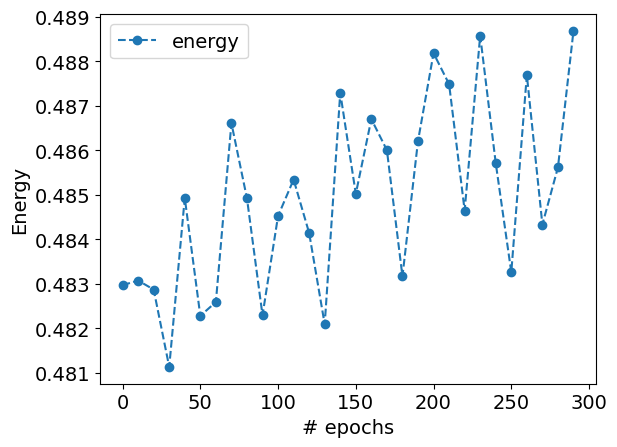

In [21]:
plt.plot(list(range(0, epochs, 10)), energy, label="energy", ls="--", marker="o")
plt.xlabel("# epochs")
plt.ylabel("Energy")
plt.legend()
plt.show()

In [22]:
A_S, A_T

([0.0054,
  0.0049,
  0.0054,
  0.0045,
  0.0053,
  0.0058,
  0.0046,
  0.004,
  0.0064,
  0.0049,
  0.0069,
  0.0035,
  0.0056,
  0.0055,
  0.0047,
  0.0058,
  0.0048,
  0.0064,
  0.0051,
  0.0048,
  0.0042,
  0.005,
  0.0042,
  0.0039,
  0.0055,
  0.0055,
  0.0039,
  0.0062,
  0.0053,
  0.0032],
 [0.0118,
  0.0122,
  0.0119,
  0.0146,
  0.0099,
  0.0121,
  0.013,
  0.0095,
  0.0088,
  0.013,
  0.0087,
  0.0113,
  0.0104,
  0.0126,
  0.0081,
  0.0093,
  0.0086,
  0.0077,
  0.0119,
  0.0091,
  0.0077,
  0.0076,
  0.0113,
  0.0076,
  0.0089,
  0.0114,
  0.0085,
  0.0096,
  0.0092,
  0.0082])

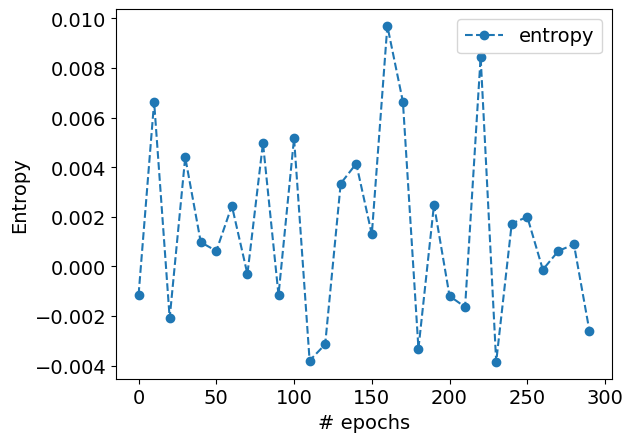

In [23]:
plt.plot(list(range(0, epochs, 10)), entropy, label="entropy", ls="--", marker="o")
plt.xlabel("# epochs")
plt.ylabel("Entropy")
plt.legend()
plt.show()

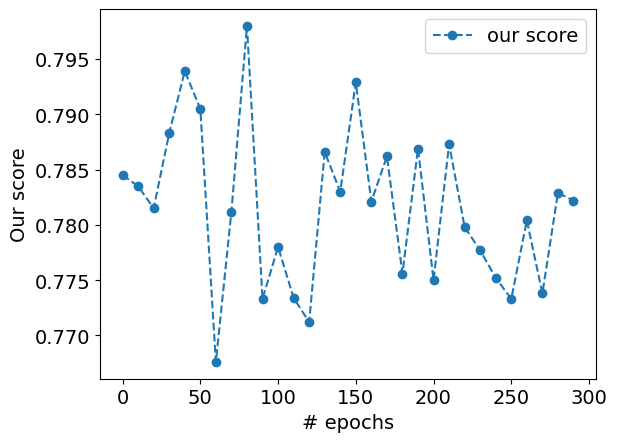

In [24]:
plt.plot(list(range(0, epochs, 10)), score, label="our score", ls="--", marker="o")
plt.xlabel("# epochs")
plt.ylabel("Our score")
plt.legend()
plt.show()

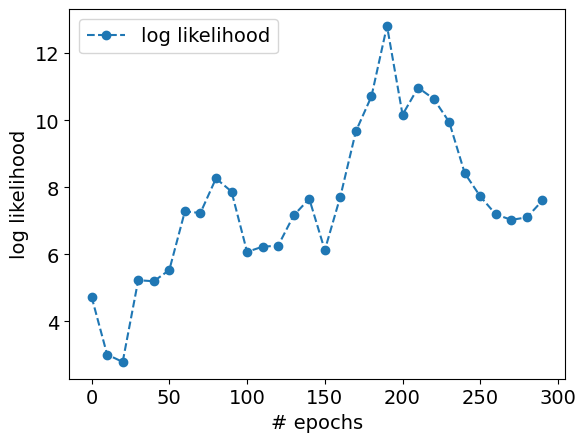

In [30]:
plt.plot(list(range(0, epochs, 10)), log_res, label="log likelihood", ls="--", marker="o")
plt.xlabel("# epochs")
plt.ylabel("log likelihood")
plt.legend()
plt.show()

In [25]:
df = pd.DataFrame(columns=["epochs", "energy", "score", "entropy", "log_likelihood"])
df["epochs"] = list(range(0, epochs, 10))
df["energy"] = energy
df["score"] = score
df["entropy"] = entropy
df["log_likelihood"] = log_res

In [26]:
# df

In [27]:
! mkdir -p "My_data_results"

Sottodirectory o file -p gi� esistente.
Errore occorso durante l'elaborazione: -p.
Sottodirectory o file My_data_results gi� esistente.
Errore occorso durante l'elaborazione: My_data_results.


In [28]:
dir_name = "My_data_results"
name = f"Adam_{n}" if ADAM else f"Vanilla_{n}"
name += "_one_hot" if one_hot else ""
name += "_CenteringTrick" if centering else "" 
name += "_Spin" if SPINS else "_NO-Spin" 
file_name = dir_name+"/"+name+".dat"
np.savetxt(file_name, df, delimiter=" ", header="epochs, energy, score, entropy, log_likelihood", comments="")

In [31]:
print(f"{file_name} created!")

My_data_results/Adam_1_one_hot_NO-Spin.dat created!


In [29]:
# to see that everything had worked
read_result = pd.read_csv(file_name, delimiter=" ")
read_result

epochs,   energy,  score,  entropy,  log_likelihood
0       0.0  0.482968  0.7845 -0.001149        4.732191
1      10.0  0.483073  0.7835  0.006634        3.009181
2      20.0  0.482871  0.7815 -0.002085        2.788997
3      30.0  0.481133  0.7883  0.004401        5.225866
4      40.0  0.484926  0.7939  0.000975        5.194778
5      50.0  0.482280  0.7905  0.000621        5.529965
6      60.0  0.482590  0.7676  0.002445        7.276483
7      70.0  0.486606  0.7812 -0.000310        7.231688
8      80.0  0.484918  0.7980  0.004976        8.260851
9      90.0  0.482293  0.7733 -0.001152        7.870574
10    100.0  0.484523  0.7780  0.005168        6.071540
11    110.0  0.485340  0.7734 -0.003800        6.225010
12    120.0  0.484140  0.7712 -0.003147        6.257072
13    130.0  0.482089  0.7866  0.003341        7.157489
14    140.0  0.487288  0.7830  0.004145        7.654753
15    150.0  0.485020  0.7929  0.001289        6.120631
16    160.0  0.486697  0.7821  0.009698        7.720043
17    170.0  0.486000  0.7862  0.006641        9.668381
18    180.0  0.483168  0.7756 -0.003314       10.709014
19    190.0  0.486206  0.7869  0.002488       12.809570
20    200.0  0.488177  0.7750 -0.001196       10.162622
21    210.0  0.487483  0.7873 -0.001639       10.968982
22    220.0  0.484645  0.7798  0.008443       10.636701
23    230.0  0.488573  0.7777 -0.003853        9.944952
24    240.0  0.485709  0.7752  0.001728        8.416962
25    250.0  0.483260  0.7733  0.001999        7.724118
26    260.0  0.487687  0.7804 -0.000133        7.187343
27    270.0  0.484331  0.7738  0.000622        7.025883
28    280.0  0.485613  0.7829  0.000888        7.100303
29    290.0  0.488677  0.7822 -0.002613        7.603947